### Actividad NLP - 2.0 - Aplicación de análisis de sentimientos
## *Tania Sayuri Guizado Hernandez - a01640992*



In [1]:
#Importamos las librerías necesarias para la actividad
import matplotlib.pyplot as plt
import requests
import re
import pandas as pd
from textblob import TextBlob

### *1. Seleccione un corpus a trabajar.*

En este caso yo elegi el libro de Romeo y Juliet por  William Shakespeare en ingles.

In [2]:
#Enlace del libro que se usara como corpus
url = "https://www.gutenberg.org/cache/epub/1513/pg1513.txt"
response = requests.get(url)

if response.status_code == 200:
    book = response.text

### *1-1. Un dataset de tweets.*

Descargue el dataset [Game of Thrones S8 (Twitter)](https://www.kaggle.com/datasets/monogenea/game-of-thrones-twitter/code)

In [3]:
# Se lee el archivo que contiene el dataset de los Tweets
dfTweet = pd.read_csv('/content/gotTwitter.csv', low_memory=False)

### *3. Aplicar un modelo pre entrenado del “sentiment analisis” y analizar reacciones de un post.*

In [4]:
# Calculamos la polaridad y subjetividad del libro.
book_sentiment = TextBlob(book)
book_polarity = book_sentiment.sentiment.polarity
book_subjectivity = book_sentiment.sentiment.subjectivity

# Definimos una función que nos ayude a analizar el sentimiento de un tweet.
def analyze_tweet_sentiment(tweet_text):
    # Se crea un objeto TextBlob a partir del texto del tweet y calcula la puntuación de sentimiento
    tweet_blob = TextBlob(tweet_text)
    sentiment_score = tweet_blob.sentiment.polarity
    # Determina si el sentimiento es positivo, negativo o neutral en función de la puntuación.
    if sentiment_score > 0:
        sentiment = "Positivo"
    elif sentiment_score < 0:
        sentiment = "Negativo"
    else:
        sentiment = "Neutral"
    return sentiment, sentiment_score

# Aplicamos la función de análisis de sentimiento a la columna 'text' de nuestro dataFrame
# porque es la que contiene los textos de los tweets
dfTweet['Sentiment'], dfTweet['Sentiment_Score'] = zip(*dfTweet['text'].apply(analyze_tweet_sentiment))

In [5]:
# Guardamos los resultados en un nuevo archivo CSV
dfTweet.to_csv('gotTwitter_with_sentiment.csv', index=False)

In [6]:
# Leemos el dataset con los resultados integrados
df = pd.read_csv('/content/gotTwitter_with_sentiment.csv', low_memory=False)

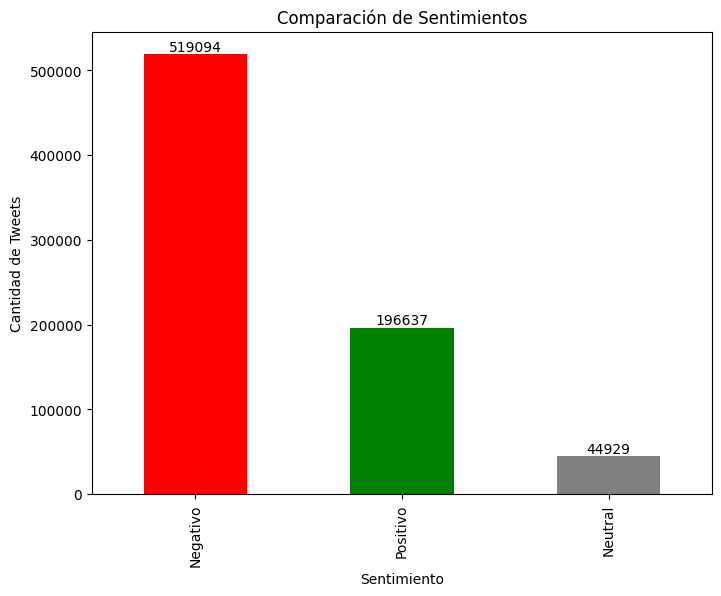

In [9]:
# Calculamos el recuento de cada tipo de sentimiento en la columna 'Sentiment'
sentiment_counts = df['Sentiment'].value_counts()


plt.figure(figsize=(8, 6))
# Creamos un gráfico de barras a partir de los valores de 'sentiment_counts'.
ax = sentiment_counts.plot(kind='bar', color=['red', 'green', 'gray'])

plt.title('Comparación de Sentimientos')
plt.xlabel('Sentimiento')
plt.ylabel('Cantidad de Tweets')

# Agregamos etiquetas con los números correspondientes a cada barra.
for i, v in enumerate(sentiment_counts):
    ax.text(i, v, str(v), ha='center', va='bottom')

# Muestra el gráfico.
plt.show()

## Conclusión
En esta actividad de NLP, seleccione el corpus del libro "Romeo y Julieta" de William Shakespeare porque me parecio rico en expresiones de sentimientos ya que en sí la mayoría de libros de este autor explora profundamente las emociones y las relaciones humanas. Por lo que en este caso decidí que sería particularmente adecuado para aplicar y analizar modelos pre-entrenados de análisis de sentimientos. También sobre el conjunto de tweets relacionados con "Game of Thrones" lo preferí mas a que fuera de una figura pública porque los usuarios tienden a expresar sus emociones y opiniones de manera más directa y abierta en relación a eventos como de una serie. Ahora con relación al modelo pre-entrenado en el análisis de sentimientos me permitió identificar si los tweets eran positivos, negativos o neutrales, ofreciendo una visión de la percepción pública sobre la serie. Esta tarea, junto con la experiencia previa en el conteo de palabras, amplió mi comprensión de cómo las técnicas de procesamiento de lenguaje natural pueden proporcionar información valiosa sobre el contenido y la opinión del público en diferentes contextos.